In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

## Veri Setine Temel Bakış ve EDA

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; font-size:100%; text-align:left">

Bu veri seti, spor salonu üyelerinin egzersiz rutinleri, fiziksel özellikleri ve fitness metriklerine dair ayrıntılı bir genel bakış sunmaktadır. 973 örnekten oluşan bu veri seti, kalp atış hızı, yakılan kalori ve egzersiz süresi gibi önemli performans göstergelerini içermektedir. Her giriş ayrıca demografik veriler ve deneyim seviyelerini de içerir, bu da fitness kalıplarının, sporcu ilerlemesinin ve sağlık eğilimlerinin kapsamlı bir şekilde analiz edilmesini sağlar.

**Ana Özellikler:**

- **Age:** Age of the gym member.
- **Gender:** Gender of the gym member (Male or Female).
- **Weight (kg):** Member’s weight in kilograms.
- **Height (m):** Member’s height in meters.
- **Max_BPM:** Maximum heart rate (beats per minute) during workout sessions.
- **Avg_BPM:** Average heart rate during workout sessions.
- **Resting_BPM:** Heart rate at rest before workout.
- **Session_Duration (hours):** Duration of each workout session in hours.
- **Calories_Burned:** Total calories burned during each session.
- **Workout_Type:** Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- **Fat_Percentage:** Body fat percentage of the member.
- **Water_Intake (liters):** Daily water intake during workouts.
- **Workout_Frequency (days/week):** Number of workout sessions per week.
- **Experience_Level:** Level of experience, from beginner (1) to expert (3).
- **BMI:** Body Mass Index, calculated from height and weight.

</div>
ht and weight.

</div>
ght and weight.

In [3]:
df = pd.read_csv("dataset/gym_members_exercise_tracking.csv")
df_ = df.copy() # daha sonrada orijinal dataya ulaşmak için kopya alıyoruz
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.Workout_Type.unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Kategorik ve Numerik Değişkenlerin Bulunması ve Görselleştirme

In [6]:
### BOŞ DEĞERLER ###
df.isnull().any()

Age                              False
Gender                           False
Weight (kg)                      False
Height (m)                       False
Max_BPM                          False
Avg_BPM                          False
Resting_BPM                      False
Session_Duration (hours)         False
Calories_Burned                  False
Workout_Type                     False
Fat_Percentage                   False
Water_Intake (liters)            False
Workout_Frequency (days/week)    False
Experience_Level                 False
BMI                              False
dtype: bool

In [7]:
#############################################
# Kategorik Değişken Analizi 
#############################################
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 5 and df[col].dtypes in ["int", "float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
df[cat_cols].nunique()
cat_cols

['Gender', 'Workout_Type']

In [8]:
df[cat_cols]

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength
...,...,...
968,Male,Strength
969,Male,Strength
970,Female,Cardio
971,Male,HIIT


In [9]:
def cat_summary(dataframe, col_name, plot=False):
    """
    Veri setindeki kategorik değişkenleri bize verir. Bunu yaparken aslında kategorik gibi görünmeyen ama kategorik olması gerekenleri de tespit ederiz. 

    Parameters
    ----------
    dataframe: dataframe
        değişkenleri alacağımız df
    col_name: string
        df içerisindeki kategorik olduğunu bildiğimiz değişkenlerdir
    plot: bool
        Bir görselleştirme yapmak istiyor musun? Eğer istiyorsak True olarak yollarız. Kategorikleri için baktığımız için basit olarak countplot dönecektir

    Notes
    ------
    İlgili kategorik değişkendeki unique ifadelerin sayıları, ve o değişken içerisindeki yüzdesini verir

    """
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################################################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        Gender      Ratio
Gender                   
Male       511  52.517986
Female     462  47.482014
#########################################################################


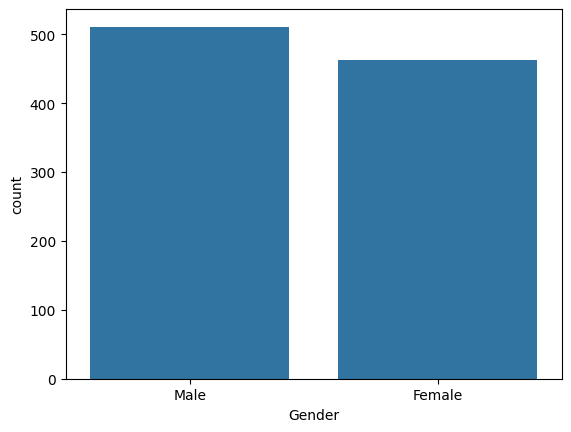

              Workout_Type      Ratio
Workout_Type                         
Strength               258  26.515930
Cardio                 255  26.207605
Yoga                   239  24.563207
HIIT                   221  22.713258
#########################################################################


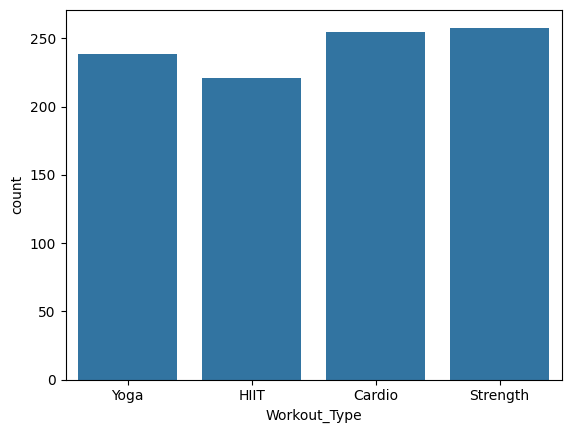

In [10]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print("Bool Değişken Kategorik Değildir")
    else:
        cat_summary(df, col, plot=True)

In [11]:
#############################################
# Sayısal Değişken Analizi 
#############################################


num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]


In [12]:
df[num_cols]

,Weight (kg),Height (m),Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
0,88.3,1.71,1.69,1313.0,12.6,3.5,30.20
1,74.9,1.53,1.30,883.0,33.9,2.1,32.00
2,68.1,1.66,1.11,677.0,33.4,2.3,24.71
3,53.2,1.70,0.59,532.0,28.8,2.1,18.41
4,46.1,1.79,0.64,556.0,29.2,2.8,14.39
...,...,...,...,...,...,...,...
968,87.1,1.74,1.57,1364.0,10.0,3.5,28.77
969,66.6,1.61,1.38,1260.0,25.0,3.0,25.69
970,60.4,1.76,1.72,929.0,18.8,2.7,19.50
971,126.4,1.83,1.10,883.0,28.2,2.1,37.74


In [13]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Bir veri setindeki bir sütunun aykırı değer sınırlarını belirler.

    Parameters
    ----------
    dataframe : DataFrame
        Aykırı değer sınırlarının belirleneceği veri seti.
    col_name : str
        Aykırı değer analizinin yapılacağı sütun adı.
    q1 : float, optional
        Çeyreklik değeri; genellikle 0.25 olarak alınır (default: 0.25).
    q3 : float, optional
        Çeyreklik değeri; genellikle 0.75 olarak alınır (default: 0.75).

    Returns
    -------
    low_limit : float
        Aşağı aykırı değer sınırı.
    up_limit : float
        Yukarı aykırı değer sınırı.

    Notes
    ------
    Fonksiyon, verilen sütundaki aykırı değerleri bulmak için IQR (Interquartile Range) yöntemini kullanır.
    1. İlk olarak, sütunun belirtilen q1 ve q3 çeyreklik değerlerini hesaplar.
    2. IQR (çeyreklikler arası mesafe) hesaplanır.
    3. Aykırı değerlerin sınırlarını belirlemek için 1.5 * IQR kuralı kullanılır:
       - Aşağı sınır (low_limit) = q1 - 1.5 * IQR
       - Yukarı sınır (up_limit) = q3 + 1.5 * IQR
    Bu sınırların dışında kalan değerler aykırı değer olarak kabul edilir.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def num_summary(dataframe, numerical_col, plot=False):
    """
    Veri setindeki sayısal değişkenleri bize verir

    Parameters
    ----------
    dataframe: dataframe
        değişkenleri alacağımız df
    col_name: string
        df içerisindeki kategorik olduğunu bildiğimiz değişkenlerdir
    plot: bool
        Bir görselleştirme yapmak istiyor musun? Eğer istiyorsak True olarak yollarız. Kategorikleri için baktığımız için basit olarak countplot dönecektir

    Notes
    ------
    İlgili sayısal değişkendeki unique ifadelerin sayıları, ve o değişken içerisindeki yüzdesini verir
    Ek olarak aykırı değer analizini de gerçekleştirir. 
    Değişken bazlı olarak 0.25 ve 0.75 banında IQR tespiti yaparak aykırı değerler tespit edilir. Grafikte gösterilir ve bu değerlerin neler olduğu yazılır. 

    """
    warnings.filterwarnings("ignore", category=FutureWarning)

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    summary = dataframe[numerical_col].describe(quantiles).T
    print(f"{numerical_col} özet istatistikleri:")
    print(summary)

    lower_bound, upper_bound = outlier_thresholds(dataframe, numerical_col)

    outliers = dataframe[(dataframe[numerical_col] < lower_bound) | (dataframe[numerical_col] > upper_bound)]
    num_outliers = outliers.shape[0]
    outlier_values = outliers[numerical_col].values
    print(f"\n{numerical_col} sütununda {num_outliers} adet aykırı değer bulunmaktadır.")
    print(f"Aykırı değerler: {outlier_values}")

    if plot:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[numerical_col], kde=True, color='skyblue')
        plt.axvline(lower_bound, color='red', linestyle='--', label='Alt Sınır')
        plt.axvline(upper_bound, color='red', linestyle='--', label='Üst Sınır')
        plt.xlabel(numerical_col)
        plt.title(f"{numerical_col} Histogram ve Yoğunluk Grafiği (Aykırı Değer Sınırları)")
        plt.legend()

        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[numerical_col], color='lightcoral')
        plt.axvline(lower_bound, color='red', linestyle='--', label='Alt Sınır')
        plt.axvline(upper_bound, color='red', linestyle='--', label='Üst Sınır')
        plt.xlabel(numerical_col)
        plt.title(f"{numerical_col} Kutu Grafiği (Aykırı Değer Sınırları)")
        plt.legend()

        plt.tight_layout()
        plt.show()

    return outliers


Weight (kg) özet istatistikleri:
count    973.000000
mean      73.854676
std       21.207500
min       40.000000
5%        45.460000
10%       49.700000
20%       55.840000
30%       60.360000
40%       64.500000
50%       70.000000
60%       75.520000
70%       82.300000
80%       88.500000
90%      107.160000
95%      118.160000
99%      127.728000
max      129.900000
Name: Weight (kg), dtype: float64

Weight (kg) sütununda 9 adet aykırı değer bulunmaktadır.
Aykırı değerler: [129.  129.5 128.2 128.4 128.4 129.9 128.4 127.9 129.2]


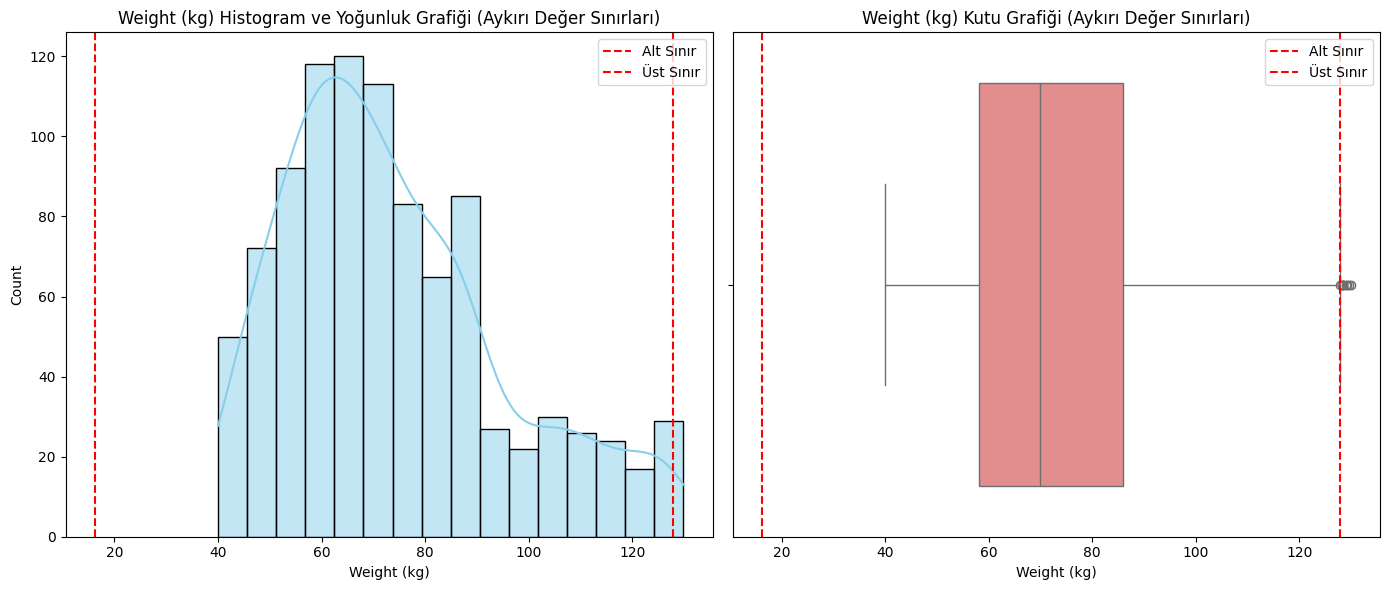

Height (m) özet istatistikleri:
count    973.00000
mean       1.72258
std        0.12772
min        1.50000
5%         1.53000
10%        1.56000
20%        1.61000
30%        1.63000
40%        1.67000
50%        1.71000
60%        1.75000
70%        1.78000
80%        1.84000
90%        1.92000
95%        1.95400
99%        1.99000
max        2.00000
Name: Height (m), dtype: float64

Height (m) sütununda 0 adet aykırı değer bulunmaktadır.
Aykırı değerler: []


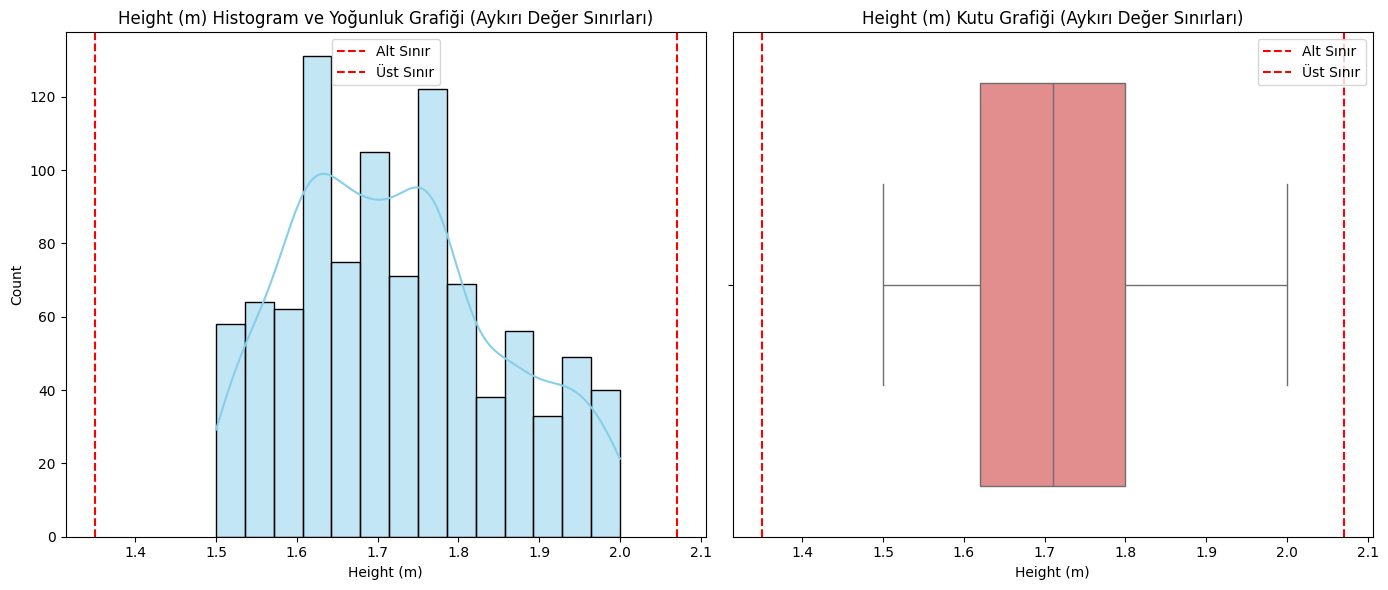

Session_Duration (hours) özet istatistikleri:
count    973.000000
mean       1.256423
std        0.343033
min        0.500000
5%         0.660000
10%        0.770000
20%        1.004000
30%        1.086000
40%        1.170000
50%        1.260000
60%        1.340000
70%        1.410000
80%        1.500000
90%        1.760000
95%        1.870000
99%        1.980000
max        2.000000
Name: Session_Duration (hours), dtype: float64

Session_Duration (hours) sütununda 0 adet aykırı değer bulunmaktadır.
Aykırı değerler: []


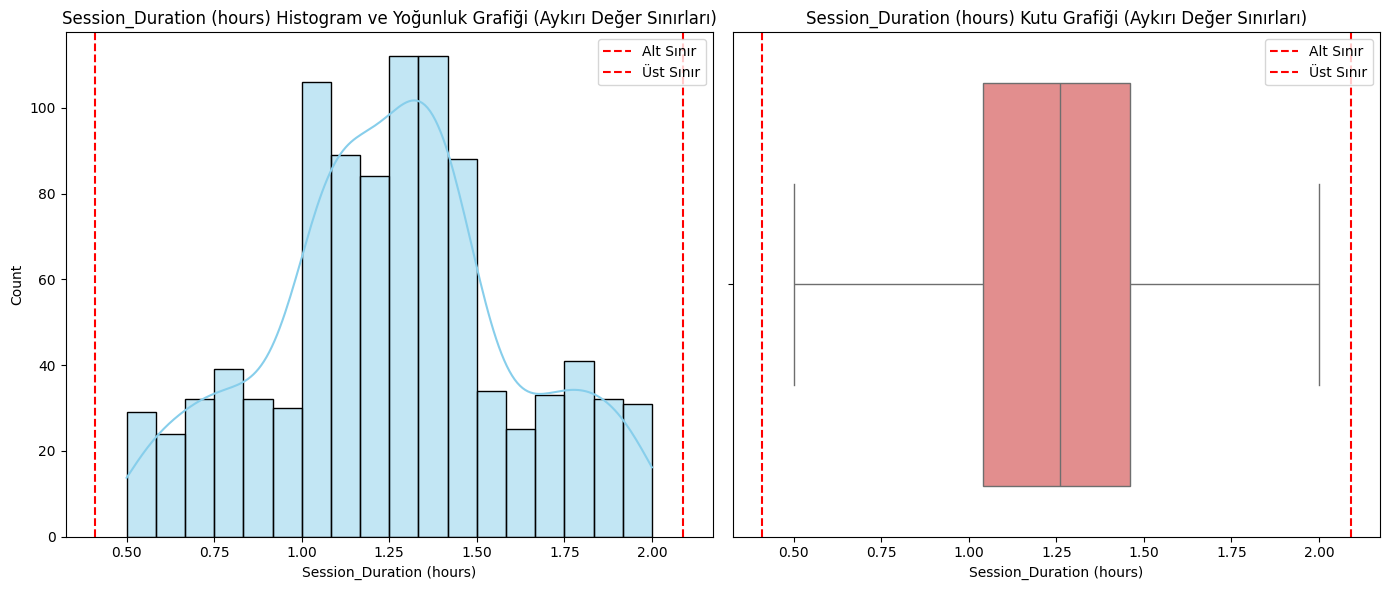

Calories_Burned özet istatistikleri:
count     973.000000
mean      905.422405
std       272.641516
min       303.000000
5%        448.000000
10%       549.600000
20%       680.000000
30%       753.000000
40%       832.000000
50%       893.000000
60%       958.000000
70%      1028.400000
80%      1134.200000
90%      1264.400000
95%      1378.000000
99%      1604.720000
max      1783.000000
Name: Calories_Burned, dtype: float64

Calories_Burned sütununda 10 adet aykırı değer bulunmaktadır.
Aykırı değerler: [1688. 1625. 1701. 1622. 1725. 1646. 1675. 1766. 1634. 1783.]


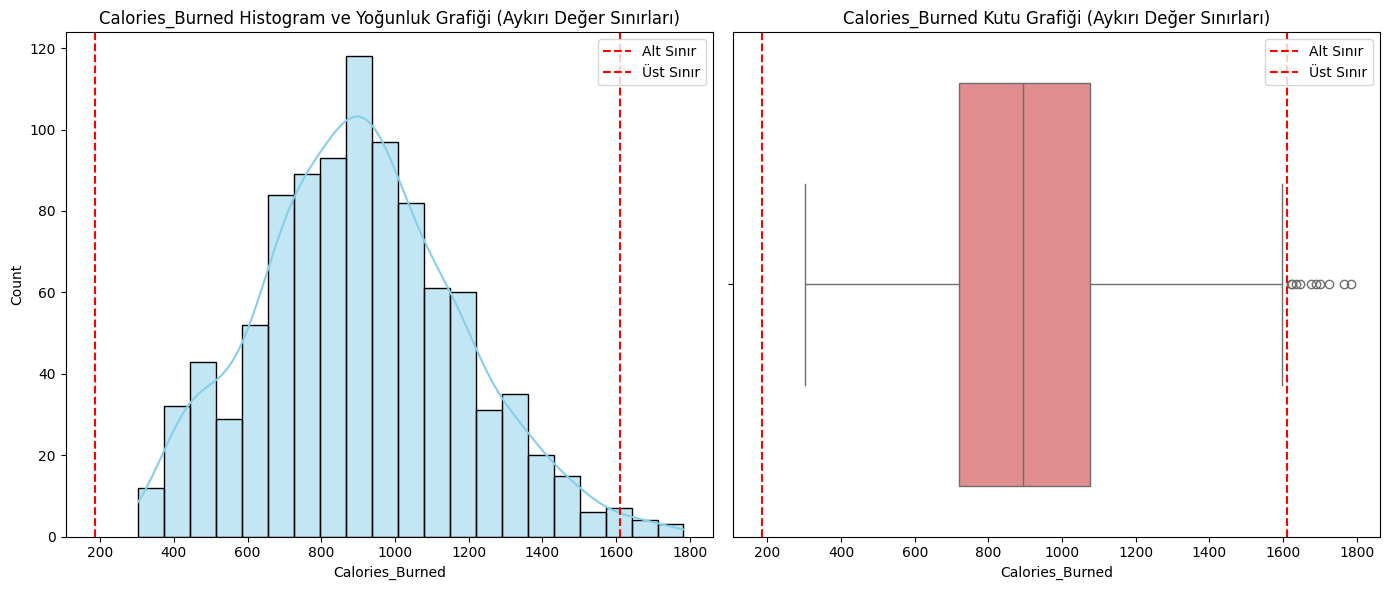

Fat_Percentage özet istatistikleri:
count    973.000000
mean      24.976773
std        6.259419
min       10.000000
5%        12.320000
10%       14.900000
20%       20.100000
30%       22.560000
40%       24.800000
50%       26.200000
60%       27.500000
70%       28.700000
80%       30.000000
90%       32.600000
95%       33.740000
99%       34.800000
max       35.000000
Name: Fat_Percentage, dtype: float64

Fat_Percentage sütununda 0 adet aykırı değer bulunmaktadır.
Aykırı değerler: []


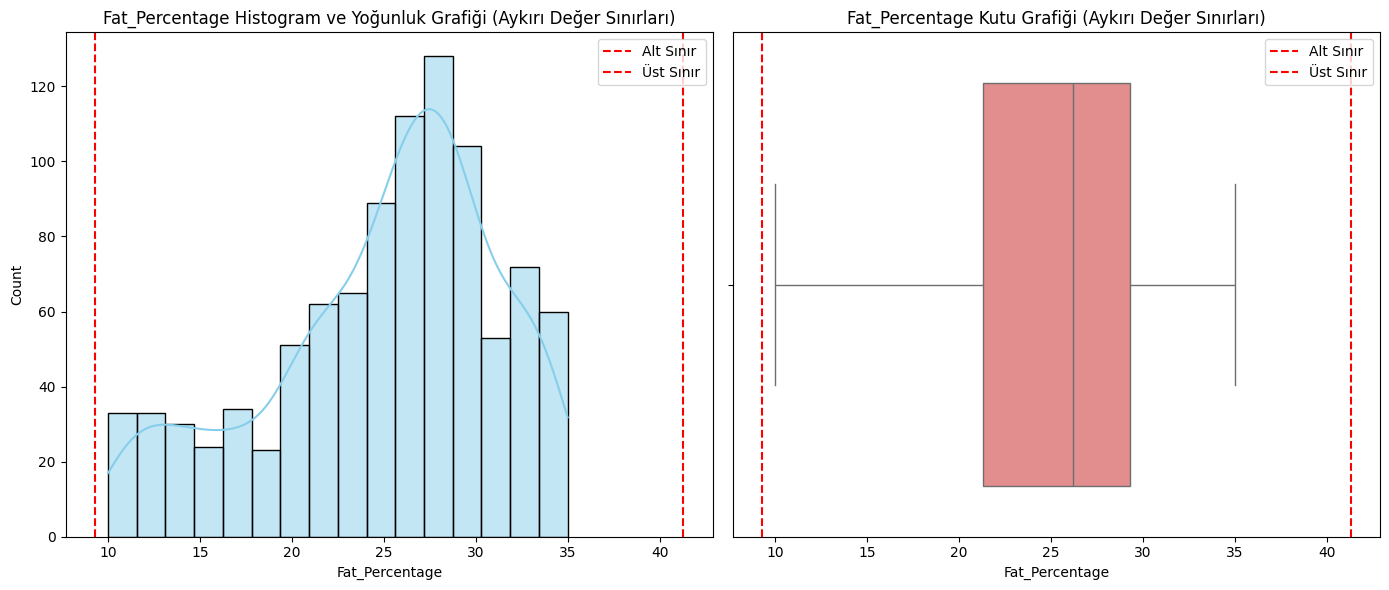

Water_Intake (liters) özet istatistikleri:
count    973.000000
mean       2.626619
std        0.600172
min        1.500000
5%         1.700000
10%        1.800000
20%        2.100000
30%        2.300000
40%        2.400000
50%        2.600000
60%        2.700000
70%        2.900000
80%        3.360000
90%        3.500000
95%        3.500000
99%        3.700000
max        3.700000
Name: Water_Intake (liters), dtype: float64

Water_Intake (liters) sütununda 0 adet aykırı değer bulunmaktadır.
Aykırı değerler: []


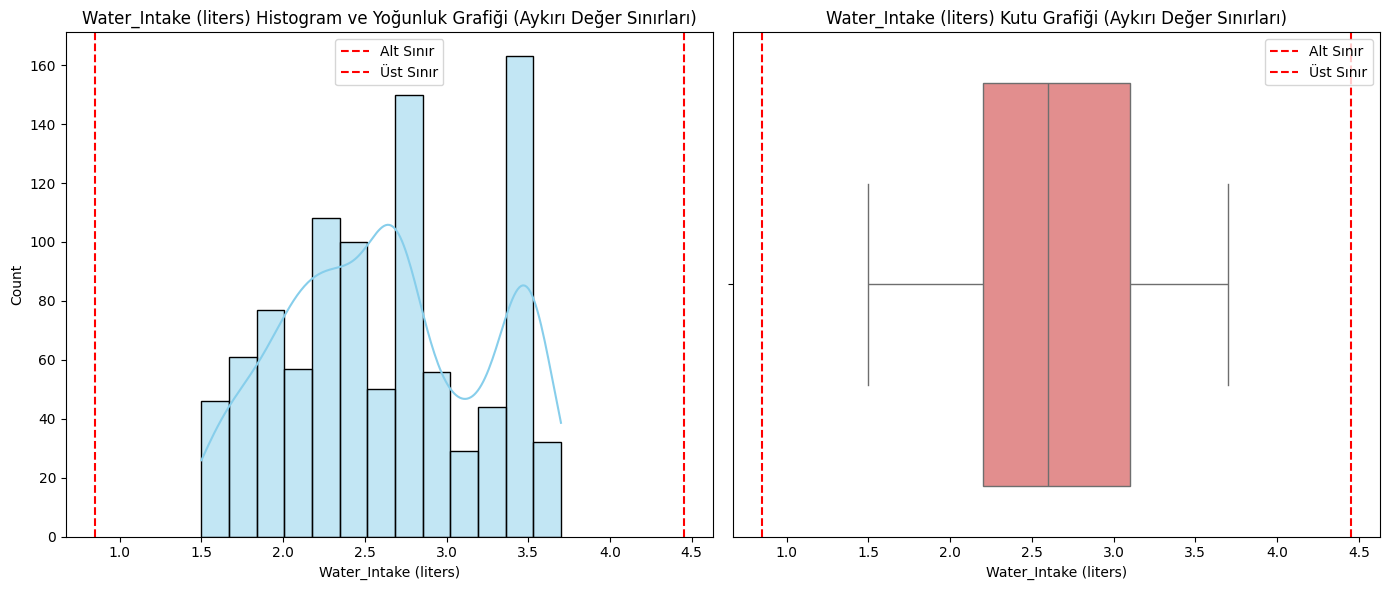

BMI özet istatistikleri:
count    973.000000
mean      24.912127
std        6.660879
min       12.320000
5%        15.448000
10%       16.994000
20%       19.114000
30%       21.160000
40%       22.788000
50%       24.160000
60%       25.730000
70%       27.584000
80%       29.962000
90%       33.490000
95%       37.542000
99%       44.924000
max       49.840000
Name: BMI, dtype: float64

BMI sütununda 25 adet aykırı değer bulunmaktadır.
Aykırı değerler: [43.31 43.4  42.63 44.84 45.43 45.14 47.72 45.49 43.31 44.71 41.6  46.9
 42.3  43.4  41.84 45.14 46.98 41.34 44.26 49.84 46.94 41.56 44.1  44.66
 48.43]


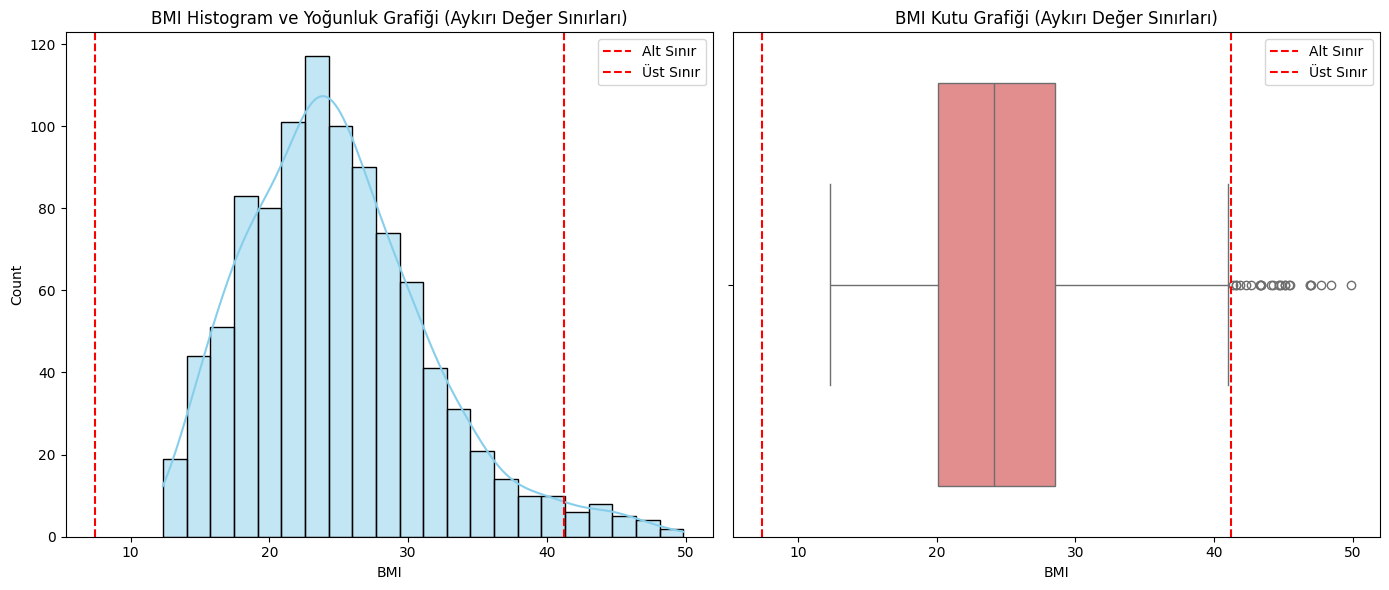

In [15]:
for col in num_cols:
    num_summary(df, col, plot=True)
    

### Aykırı Değerlere Müdahale

In [16]:
def fill_outliers_with_median(dataframe, col_name):
    """
    Aykırı değerleri medyan değeri ile doldurur.

    Parameters
    ----------
    dataframe : DataFrame
        Aykırı değerlerin doldurulacağı veri seti.
    col_name : str
        Aykırı değerleri doldurulacak sütun adı.

    Returns
    -------
    DataFrame
        Aykırı değerlerin medyan ile doldurulduğu güncellenmiş veri seti.
    """
    # Eşik değerleri hesapla
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    
    # Medyan değeri hesapla
    median_value = dataframe[col_name].median()
    
    # Aykırı değerleri medyan ile doldur
    dataframe.loc[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit), col_name] = median_value
    return dataframe


In [17]:
fill_outliers_with_median(df,"BMI")

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [18]:
fill_outliers_with_median(df,"Calories_Burned")

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [19]:
fill_outliers_with_median(df,"Weight (kg)")

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


BMI özet istatistikleri:
count    973.000000
mean      24.386670
std        5.830857
min       12.320000
5%        15.448000
10%       16.994000
20%       19.114000
30%       21.160000
40%       22.788000
50%       24.160000
60%       25.334000
70%       26.984000
80%       29.248000
90%       32.492000
95%       34.812000
99%       39.431600
max       41.030000
Name: BMI, dtype: float64

BMI sütununda 10 adet aykırı değer bulunmaktadır.
Aykırı değerler: [40.1  40.71 40.09 40.45 40.26 39.77 40.79 41.03 40.52 40.09]


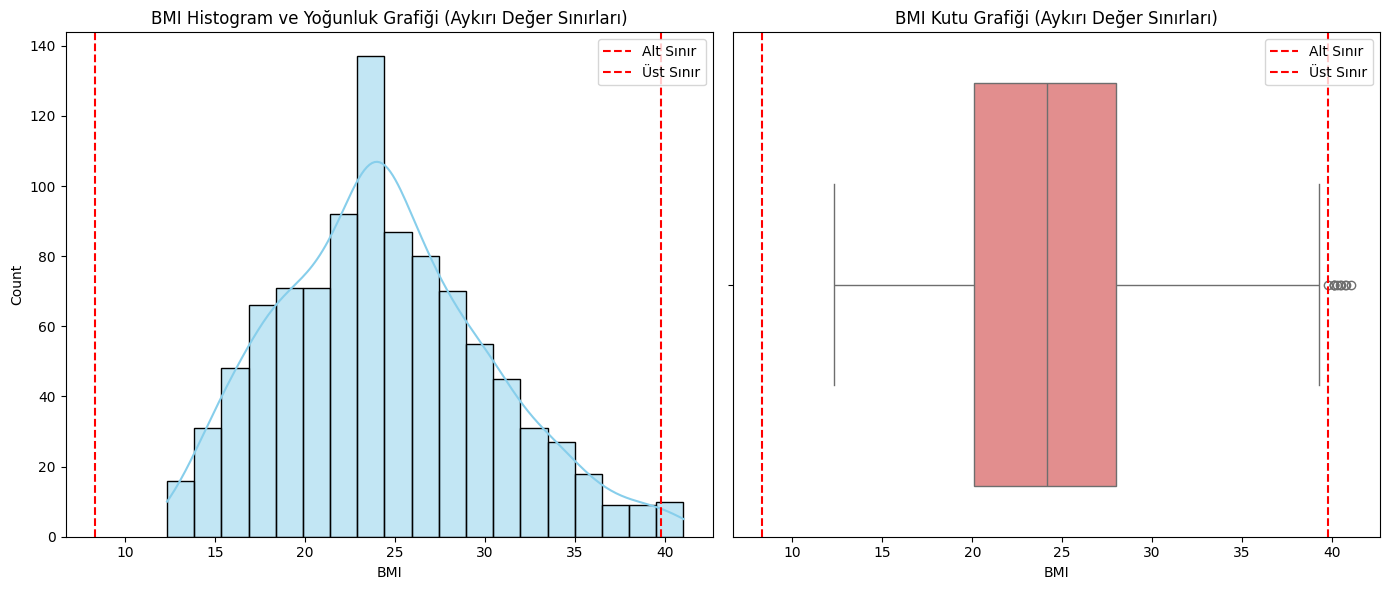

Calories_Burned özet istatistikleri:
count     973.000000
mean      896.542652
std       259.721982
min       303.000000
5%        448.000000
10%       549.600000
20%       680.000000
30%       753.000000
40%       832.000000
50%       893.000000
60%       950.200000
70%      1022.800000
80%      1118.200000
90%      1239.400000
95%      1355.400000
99%      1497.840000
max      1587.000000
Name: Calories_Burned, dtype: float64

Calories_Burned sütununda 0 adet aykırı değer bulunmaktadır.
Aykırı değerler: []


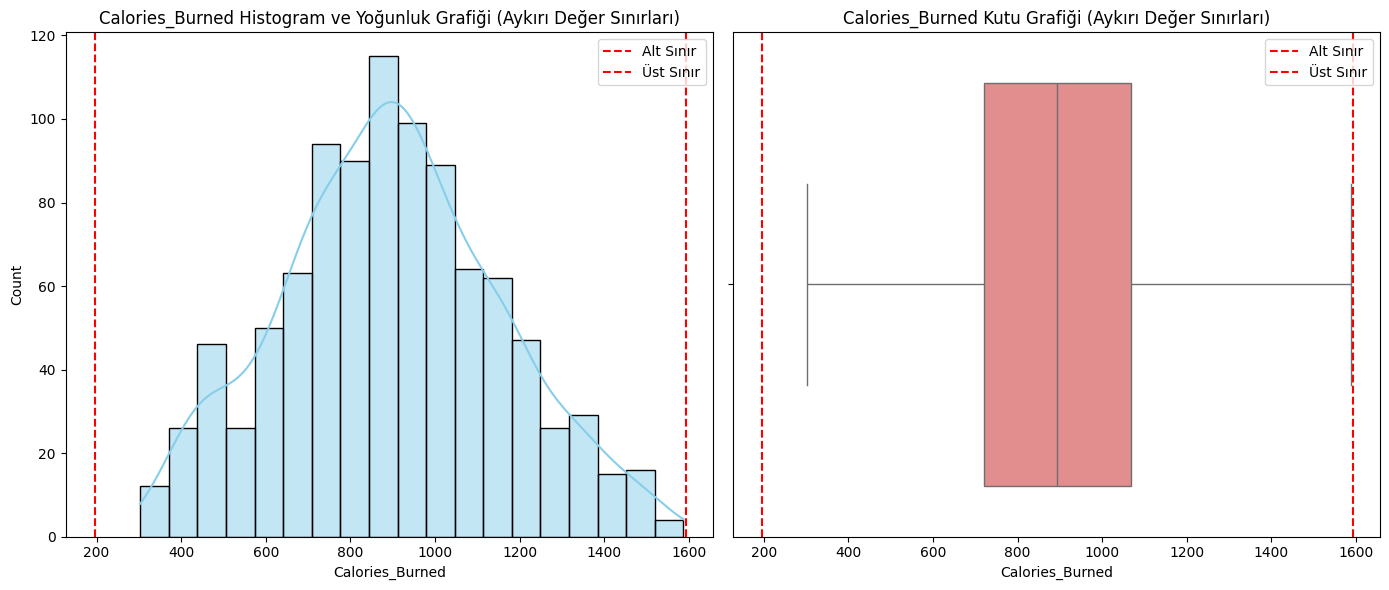

Weight (kg) özet istatistikleri:
count    973.000000
mean      72.898356
std       20.013424
min       40.000000
5%        45.460000
10%       49.700000
20%       55.840000
30%       60.360000
40%       64.500000
50%       70.000000
60%       74.040000
70%       81.400000
80%       87.960000
90%      103.500000
95%      114.320000
99%      124.884000
max      126.400000
Name: Weight (kg), dtype: float64

Weight (kg) sütununda 7 adet aykırı değer bulunmaktadır.
Aykırı değerler: [125.9 125.5 125.9 125.9 126.4 125.5 126.4]


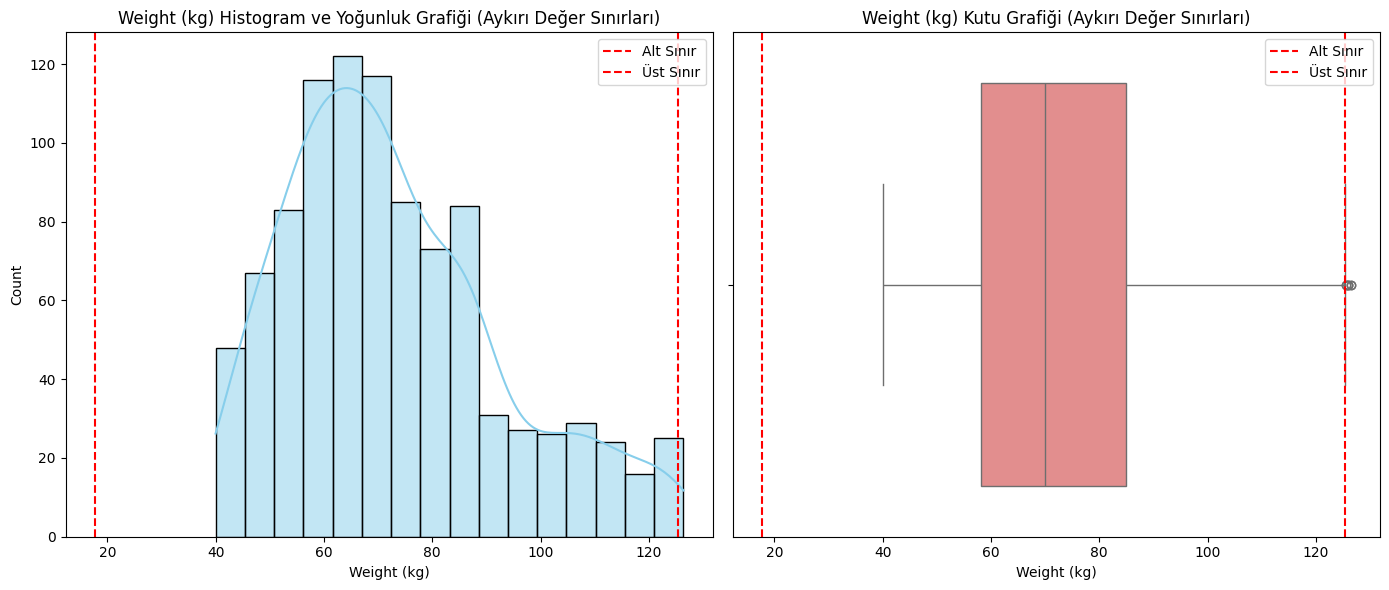

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
286,29,Male,125.9,2.00,186,152,67,1.36,1137.0,Strength,24.7,3.1,4,2,31.48
376,56,Male,125.5,1.80,189,131,73,1.26,817.0,Strength,20.9,2.7,4,2,38.73
456,54,Male,125.9,1.94,199,132,73,1.35,882.0,Strength,28.5,2.9,3,2,33.45
687,18,Male,125.9,1.67,172,153,60,1.46,1229.0,Yoga,20.6,2.2,3,2,24.16
833,59,Male,126.4,1.69,168,149,68,1.24,915.0,Strength,29.5,2.9,3,1,24.16
852,26,Male,125.5,1.76,176,163,66,1.15,1031.0,Yoga,23.2,3.1,4,2,40.52
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [20]:
num_summary(df,"BMI",True)
num_summary(fill_outliers_with_median(df,"Calories_Burned"),"Calories_Burned",True)
num_summary(fill_outliers_with_median(df,"Weight (kg)"),"Weight (kg)",True)

In [21]:
#############################################
# Korelasyon Analizi (Analysis of Correlation)
#############################################

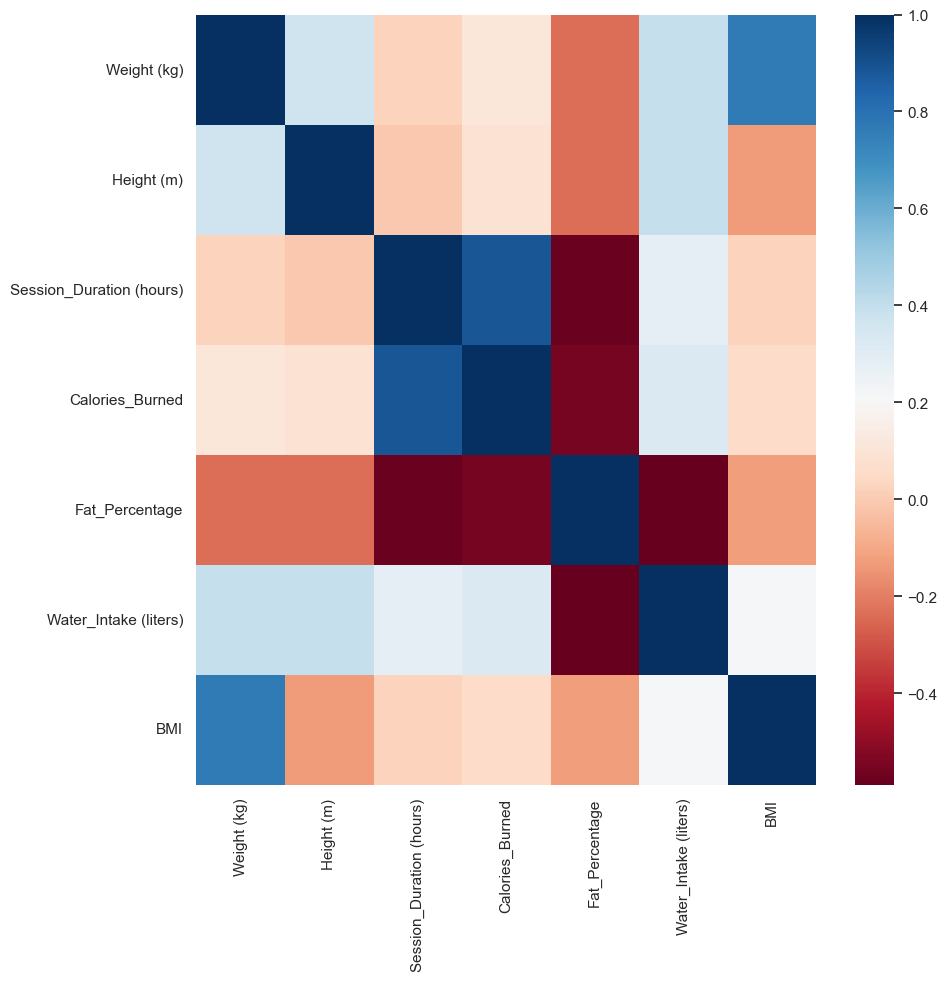

In [22]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(corr, cmap="RdBu")
plt.show()


### Encoding 

In [23]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder_gender = LabelEncoder()
encoder_workout = LabelEncoder()

df["Gender"] = encoder_gender.fit_transform(df["Gender"])
df["Workout_Type"] = encoder_workout.fit_transform(df["Workout_Type"])

df.head()

# Cardio -> 0
# HIIT -> 1
# Strength -> 2
# Yoga ->3

# Male -> 0
# Female -> 1

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [26]:
df.drop("Workout_Frequency (days/week)", axis = 1 , inplace= True)

In [27]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,1,14.39


In [28]:
df.drop("Experience_Level", axis = 1 , inplace= True)

In [29]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,14.39


In [30]:
df.to_csv("dataset/lastDataset.csv", index=False)

In [31]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\90531\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## Machine Learning

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [51]:
# Verileri bölme
X = df.drop(columns=['Calories_Burned'])
y = df['Calories_Burned']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model tanımlama ve parametre optimizasyonu için GridSearchCV kullanma

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 2. KNN
knn = KNeighborsRegressor()
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# 3. Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Model performans değerlendirmesi
models = {
    "Linear Regression": y_pred_lr,
    "KNN": y_pred_knn,
    "Gradient Boosting": y_pred_gb
}

for name, y_pred in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R2 = {r2:.2f}")


Linear Regression: RMSE = 0.33, R2 = 0.90
KNN: RMSE = 0.52, R2 = 0.75
Gradient Boosting: RMSE = 0.28, R2 = 0.93


In [33]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,14.39


In [34]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Choose a target variable
X = df.drop(columns=['Calories_Burned'])  
y = df['Calories_Burned'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

# Dictionary of models with parameters to evaluate performance
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
}

In [36]:
# Best model variables
best_model_name = None
best_model = None
best_rmse_score = float('inf')  # Start with infinity for minimization

# Train, predict, and evaluate each model
model_score = []
for name, model in models.items():
    model.fit(X_train, y_train)  

    # Make predictions from each model
    y_pred = model.predict(X_test)  

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics in the list
    model_score.append((name, mse, rmse, r2, mae))

    # Print the performance metrics
    print(f"{name} - MSE: {mse}")
    print(f"{name} - RMSE: {rmse}")
    print(f"{name} - R²: {r2}")
    print(f"{name} - MAE: {mae}\n")

    # Update the best model if current model's RMSE is lower
    if rmse < best_rmse_score:  # Corrected: Minimizing RMSE
        best_rmse_score = rmse
        best_model_name = name
        best_model = model

print(f"Best Model: {best_model_name} with RMSE score of {best_rmse_score}")


Linear Regression - MSE: 0.11048653018794781
Linear Regression - RMSE: 0.332395141643117
Linear Regression - R²: 0.8999812856021551
Linear Regression - MAE: 0.15882549503315013

Decision Tree Regressor - MSE: 0.18132213843289524
Decision Tree Regressor - RMSE: 0.42581937301266043
Decision Tree Regressor - R²: 0.8358568492731566
Decision Tree Regressor - MAE: 0.2851968076445838

Random Forest Regressor - MSE: 0.11103641879566033
Random Forest Regressor - RMSE: 0.3332212760248966
Random Forest Regressor - R²: 0.8994834950433253
Random Forest Regressor - MAE: 0.2213262742626144

KNeighbors Regressor - MSE: 0.28192313592415313
KNeighbors Regressor - RMSE: 0.530964345247544
KNeighbors Regressor - R²: 0.7447870834012438
KNeighbors Regressor - MAE: 0.4051659348031057

Support Vector Regressor - MSE: 0.09678996292974842
Support Vector Regressor - RMSE: 0.3111108531211157
Support Vector Regressor - R²: 0.9123802001711833
Support Vector Regressor - MAE: 0.16624075645767075

Gradient Boosting Reg

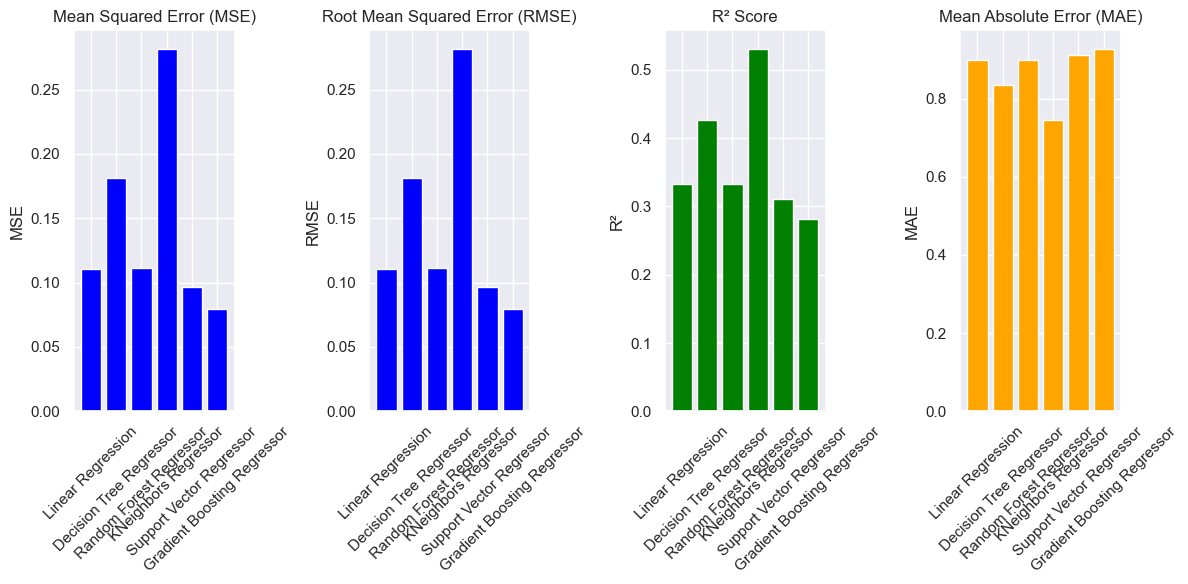

In [50]:
# Plotting the results
model_names = [score[0] for score in model_score]
mse_values = [score[1] for score in model_score]
r2_values = [score[2] for score in model_score]
mae_values = [score[3] for score in model_score]

x = range(len(model_names))

plt.figure(figsize=(12, 6))

# Create bar plots for each metric
plt.subplot(1, 4, 1)
plt.bar(x, mse_values, color='blue')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 4, 2)
plt.bar(x, mse_values, color='blue')
plt.xticks(x, model_names, rotation=45)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')


plt.subplot(1, 4, 3)
plt.bar(x, r2_values, color='green')
plt.xticks(x, model_names, rotation=45)
plt.title('R² Score')
plt.ylabel('R²')

plt.subplot(1, 4, 4)
plt.bar(x, mae_values, color='orange')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grids = {
    'Decision Tree Regressor': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'random_state': [42]
    },
    'KNeighbors Regressor': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance']
    },
    'Support Vector Regressor': {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5]
    },
    'Gradient Boosting Regressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best CV MSE for {name}: {np.sqrt(-grid_search.best_score_)}")
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

for name, model in best_models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"Test RMSE for {name}: {rmse}")


Tuning Linear Regression...
Tuning Decision Tree Regressor...
Best parameters for Decision Tree Regressor: {'max_depth': 5, 'min_samples_split': 2}
Best CV MSE for Decision Tree Regressor: 0.38487058551839287
Tuning Random Forest Regressor...
Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 50, 'random_state': 42}
Best CV MSE for Random Forest Regressor: 0.2850395226608378
Tuning KNeighbors Regressor...
Best parameters for KNeighbors Regressor: {'n_neighbors': 10, 'weights': 'distance'}
Best CV MSE for KNeighbors Regressor: 0.4864167973653382
Tuning Support Vector Regressor...
Best parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.1}
Best CV MSE for Support Vector Regressor: 0.2697227891249696
Tuning Gradient Boosting Regressor...
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best CV MSE for Gradient Boosting Regressor: 0.22731042301590387
Test RMSE for Linear Regression: 0.332395